# ANÁLISIS EXPLORATORIO DE DATOS

In [1]:
# Importar las librerías
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

En este notebook se lleva a cabo el proceso de EDA sobre los datos ya revisados y transformados en un proceso de ETL. Cabe tener en cuenta que dicho proceso se realizó teniendo en mente los Endpoints solicitados en la consigna del proyecto y con ese propósito se realizaron las transformaciones y la eliminación de columnas. Los datasets aquí analizados son el resultado de ese proceso de ETL previo.

In [2]:
# Cargar los archivos ya limpios  trabajados en el ETL
df_games = pd.read_parquet('steam_games.parquet')
df_reviews = pd.read_parquet('user_reviews.parquet')
df_items = pd.read_parquet('user_items.parquet')

## EDA del dataset Steam Games
Este dataset contiene información sobre los juegos de la plataforma Steam y sus características

In [3]:
df_games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27508 entries, 0 to 27507
Data columns (total 27 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Name                   27508 non-null  object 
 1   Price                  27508 non-null  float64
 2   Game_id                27508 non-null  float64
 3   Developer              27508 non-null  object 
 4   Release_year           27508 non-null  int64  
 5   Accounting             27508 non-null  int64  
 6   Action                 27508 non-null  int64  
 7   Adventure              27508 non-null  int64  
 8   Animation & Modeling   27508 non-null  int64  
 9   Audio Production       27508 non-null  int64  
 10  Casual                 27508 non-null  int64  
 11  Design & Illustration  27508 non-null  int64  
 12  Early Access           27508 non-null  int64  
 13  Education              27508 non-null  int64  
 14  Free to Play           27508 non-null  int64  
 15  In

### Lo primero que hago es una descripción general con valores estadísiticos

In [4]:

df_games.describe(include='all')

,Name,Price,Game_id,Developer,Release_year,Accounting,Action,Adventure,Animation & Modeling,Audio Production,...,Photo Editing,RPG,Racing,Simulation,Software Training,Sports,Strategy,Utilities,Video Production,Web Publishing
count,27508,27508.000000,2.750800e+04,27508,27508.00000,27508.000000,27508.000000,27508.000000,27508.000000,27508.000000,...,27508.000000,27508.000000,27508.000000,27508.000000,27508.000000,27508.000000,27508.000000,27508.000000,27508.000000,27508.000000
unique,27490,NaN,NaN,10620,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,Soundtrack,NaN,NaN,Ubisoft - San Francisco,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,3,NaN,NaN,1258,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,9.006959,4.414198e+05,NaN,2014.86204,0.000254,0.387487,0.283554,0.006253,0.002981,...,0.002799,0.186091,0.038171,0.236477,0.003599,0.043878,0.243093,0.011597,0.003744,0.009452
std,NaN,15.973444,1.860741e+05,NaN,3.27765,0.015950,0.487185,0.450731,0.078828,0.054518,...,0.052834,0.389187,0.191612,0.424926,0.059884,0.204828,0.428959,0.107063,0.061078,0.096762
min,NaN,0.000000,1.000000e+01,NaN,1983.00000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,NaN,2.990000,3.168845e+05,NaN,2014.00000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,NaN,4.990000,4.367500e+05,NaN,2016.00000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,NaN,9.990000,5.873925e+05,NaN,2017.00000,0.000000,1.000000,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


Algunas observaciones que puedo extraer de esta primera exploración:
- Hay un total de 27.508, registros, que corresponden a 27.508 juegos. (valores únicos de Game_id)
- A pesar de lo anterior, puedo ver que no todos los valores de Name son únicos, así que probablemente hay juegos que son diferentes, pues su id es diferente, pero tienen el mismo nombre.
- Los precios varían entre 0 y 995, siendo 9 el valor promedio.

### Quiero consultar la cantidad de juegos lanzados por año:

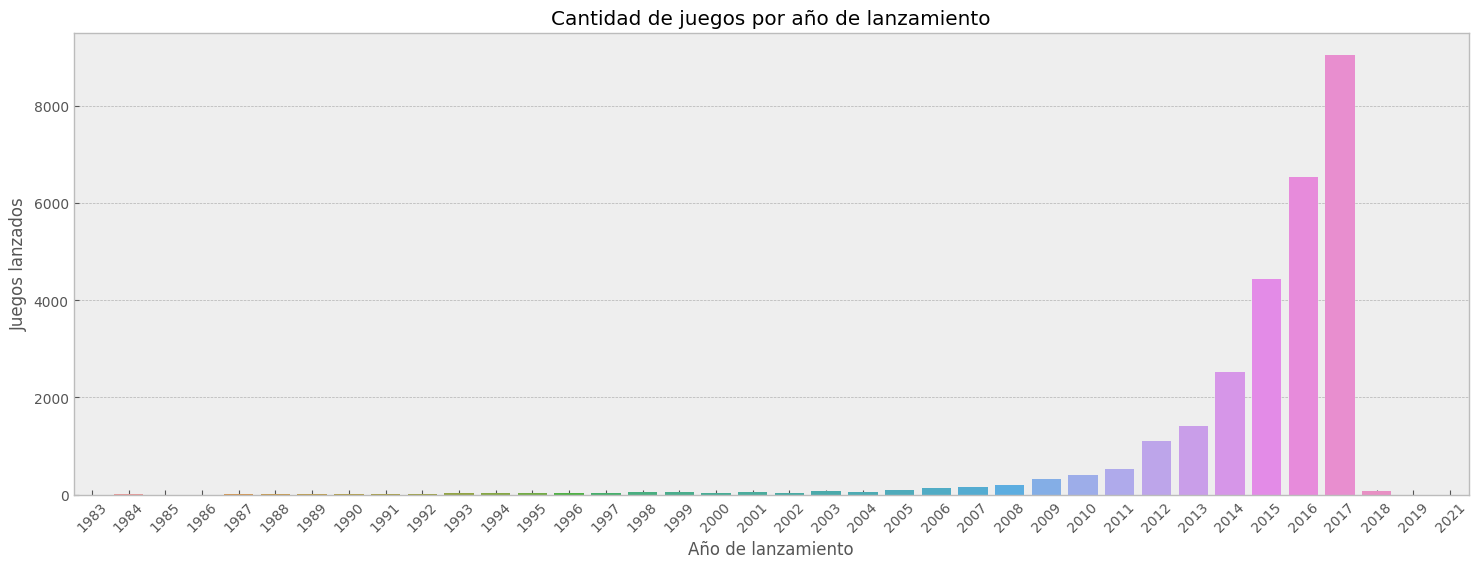

In [67]:
plt.style.use('fast')
plt.figure(figsize=(18,6))
sns.countplot(data = df_games, x = "Release_year")
plt.xticks(rotation=45)
plt.ylabel('Juegos lanzados')
plt.xlabel('Año de lanzamiento')
plt.title('Cantidad de juegos por año de lanzamiento')
plt.show()

### Ahora quiero observar y comparar la cantidad de juegos correspondientes a cada género

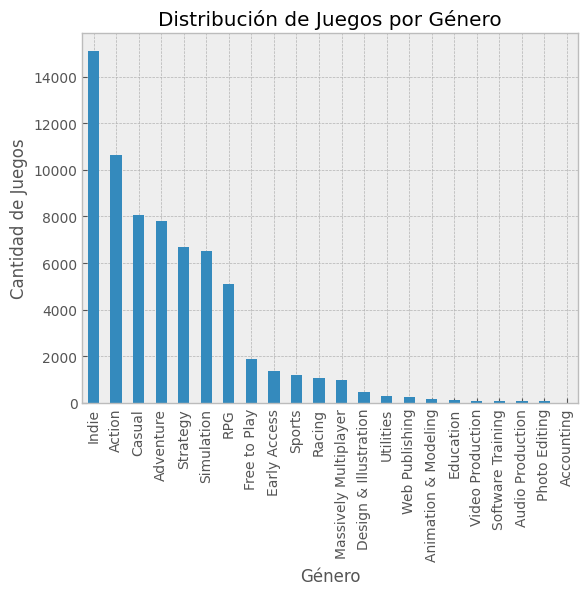

In [53]:
generos = df_games.drop(columns=['Name', 'Price', 'Game_id', 'Developer', 'Release_year'])
generos.sum().sort_values(ascending=False).plot(kind='bar')
plt.xlabel('Género')
plt.ylabel('Cantidad de Juegos')
plt.title('Distribución de Juegos por Género')
plt.show()

### Reviso también la cantidad de juegos por desarrollador

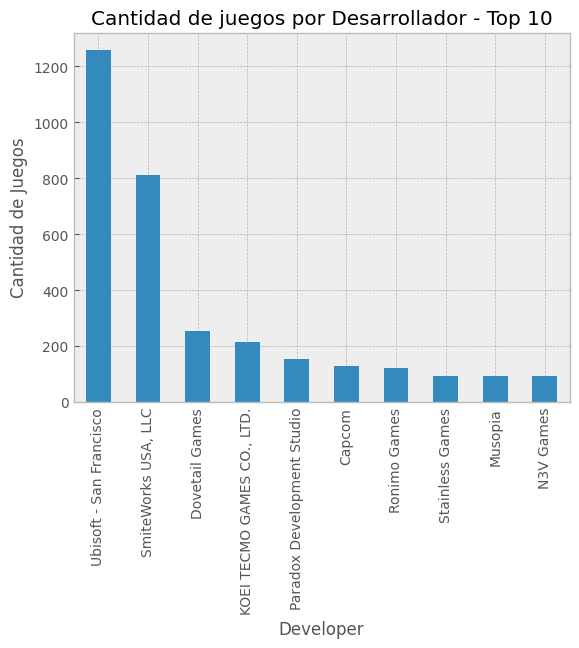

In [66]:
games_per_developer=df_games.groupby("Developer")["Game_id"].count()
games_per_developer.sort_values(ascending=False).head(10).plot(kind='bar')
plt.title('Cantidad de juegos por Desarrollador - Top 10')
plt.ylabel('Cantidad de Juegos')
plt.xlabel('Developer')
plt.show()

### Quiero observar mejor cómo se encuentran distribuidos los precios de los juegos

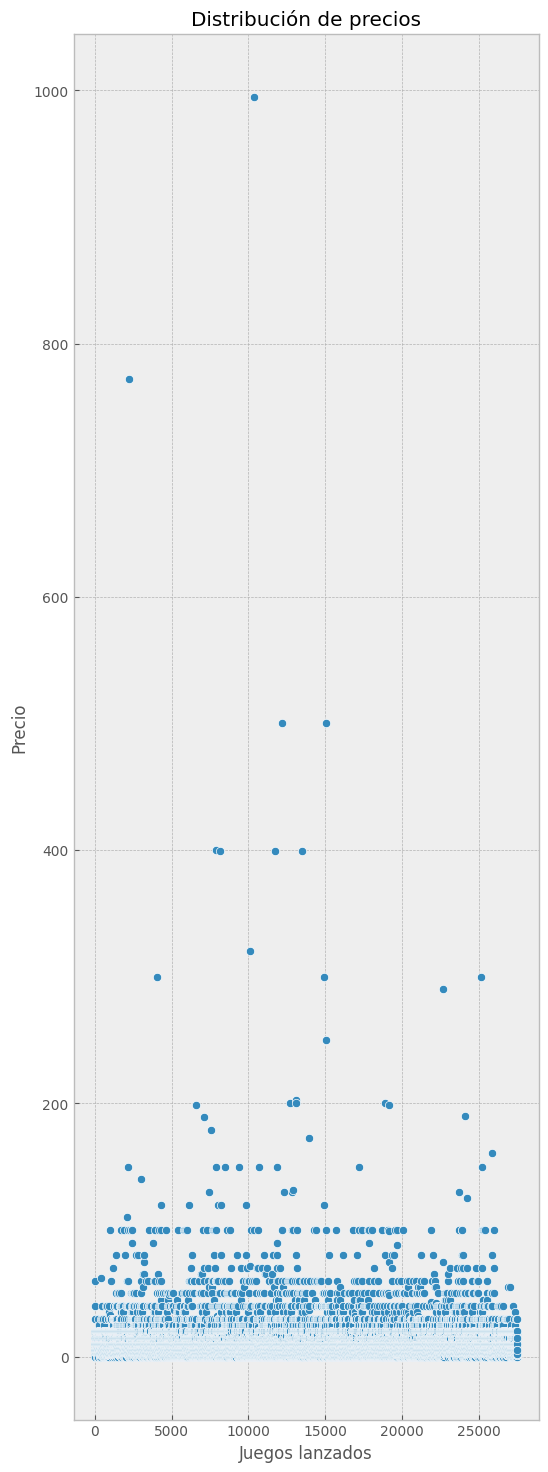

In [54]:
plt.figure(figsize=(6,18))
sns.scatterplot(data = df_games['Price'])
plt.ylabel('Precio')
plt.xlabel('Juegos lanzados')
plt.title('Distribución de precios')
plt.show()

A pesar de que la gráfica no es muy detallada, puedo notar fácilmente que muy pocos juegos están por encima de los 200 y que la gran mayoría se encuentran entre 0 y 50 aproximadamente.
Tal vez sea apropiado crear un nuevo dataset que deje por fuera los outliers, por ejemplo tomando sólo los juegos cuyo precio sea menor a 200 para utilizar en el sistema de recomendación.

In [88]:
df_precios_sin_utliers_200 = df_games[df_games['Price']<= 200]
df_precios_sin_utliers_200.shape

(27492, 27)

Puedo ver que de 27.508 juegos, son 27.492 los que se encuentran por debajo de los 200, casi todo el dataset. me da curiosidad saber cuántos están por debajo de los 100, voy a revisarlo.

In [89]:
df_precios_sin_utliers_100 = df_games[df_games['Price']<= 100]
df_precios_sin_utliers_100.shape

(27456, 27)

En conclusión, de los 27.508 juegos, 16 están por encima de los 200, 36 entre los 100 y los 200 y los demás por debajo de 100.

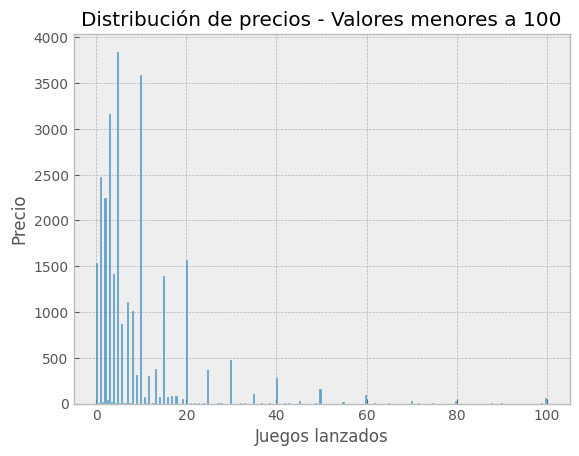

In [90]:
sns.histplot(x = "Price", data = df_precios_sin_utliers_100)
plt.ylabel('Precio')
plt.xlabel('Juegos lanzados')
plt.title('Distribución de precios - Valores menores a 100')
plt.show()

Ahora voy a revisar el promedio de precios, tanto con el dataset completo como con el que tiene solo los juegos con precio menor a 100

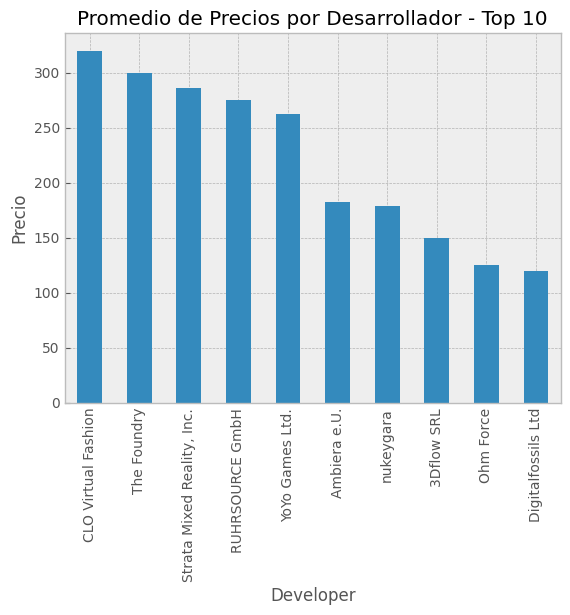

In [91]:
#Observación sobre el dataset que incluye los outliers:
developer_avg=df_games.groupby("Developer")["Price"].mean()
developer_avg.sort_values(ascending=False).head(10).plot(kind='bar')
plt.title('Promedio de Precios por Desarrollador - Top 10')
plt.ylabel('Precio')
plt.xlabel('Developer')
plt.show()

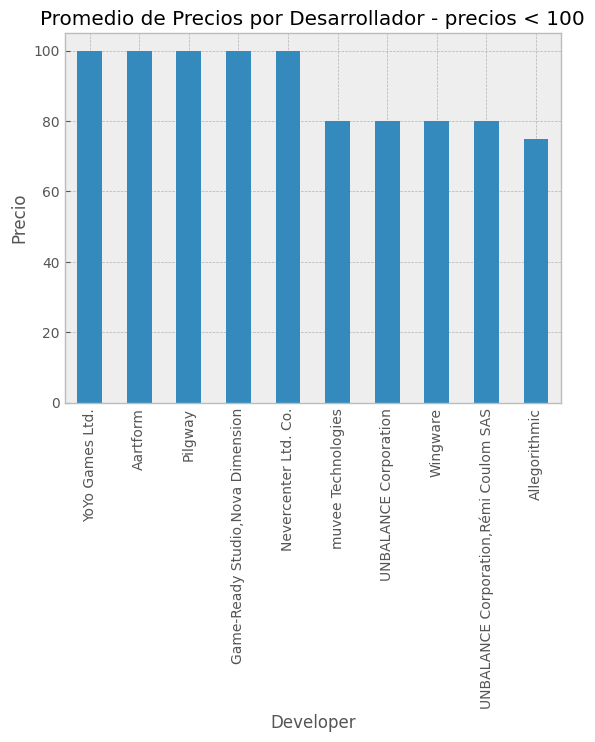

In [92]:
# Observación sólo sobre los juegos cuyo precio es menor a 100
developer_avg=df_precios_sin_utliers_100.groupby("Developer")["Price"].mean()
developer_avg.sort_values(ascending=False).head(10).plot(kind='bar')
plt.title('Promedio de Precios por Desarrollador - precios < 100')
plt.ylabel('Precio')
plt.xlabel('Developer')
plt.show()

### EDA del dataset User Items
Este dataset contiene información sobre los juegos que han sido adquiridos por cada usuario, así como el tiempo acumulado de juego para cada uno de ellos.

In [68]:
df_items.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5094105 entries, 0 to 5094104
Data columns (total 4 columns):
 #   Column    Dtype  
---  ------    -----  
 0   User_id   object 
 1   Game_id   float64
 2   Name      object 
 3   Playtime  float64
dtypes: float64(2), object(2)
memory usage: 155.5+ MB


In [69]:
# Lo primero que hago es una descripción general con valores estadísiticos
df_items.describe(include='all')

,User_id,Game_id,Name,Playtime
count,5094105,5.094105e+06,5094105,5.094105e+06
unique,70912,NaN,10947,NaN
top,phrostb,NaN,Dota 2 Test,NaN
freq,7762,NaN,49136,NaN
mean,NaN,1.783916e+05,NaN,9.905511e+02
std,NaN,1.318516e+05,NaN,5.414297e+03
min,NaN,1.000000e+01,NaN,0.000000e+00
25%,NaN,3.445000e+04,NaN,0.000000e+00
50%,NaN,2.144200e+05,NaN,3.400000e+01
75%,NaN,2.664300e+05,NaN,3.550000e+02


De aquí puedo observar que hay 70.912 usuarios registrados en la plataforma (valores únicos de user_id), también que los tiempos de juego registrados van entre 0 y 642.773.  Esta columma corresponde a tiempo total de juego por parte de cada usuario desde el momento de adquirir el juego (Playtime forever).

NOTA: La magnitud del los valores más altos de esa columna me hace pensar que la unidad de medida no son las horas, sino los minutos, pero para evitar complicar el desarrollo del proyecto, transformando minutos a horas para poder entregar los resultados de las búsquedas en el formato solicitado, asumiré que la medición corresponde a horas de juego.

### Analizo con más detalles los tiempo de juego

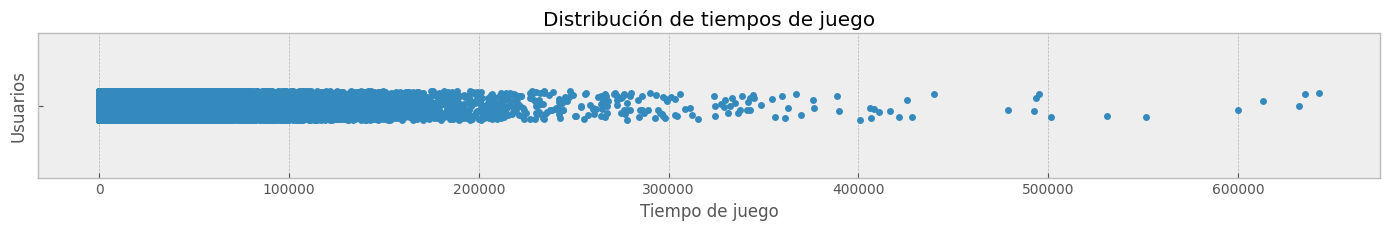

In [106]:
fig = plt.figure(figsize=(14, 4))

ax1 = fig.add_subplot(211)
sns.stripplot(data=df_items, x='Playtime', ax=ax1)
ax1.set_xlabel('Tiempo de juego') ; ax1.set_ylabel('Usuarios') ; ax1.set_title('Distribución de tiempos de juego')

# ajustar el espaciado entre subplots
plt.tight_layout()
plt.show()

A pesar de que la gráfica no es muy detallada, puedo notar fácilmente que muy pocos usuarios tienen un tiempo de juego por encima de 300000 y que la gran mayoría se encuentran entre 0 y 100000 aproximadamente.

In [98]:
df_items_sin_outliers_100K = df_items[df_items['Playtime']<= 100000]
df_items_sin_outliers_100K.shape

(5091675, 4)

In [99]:
df_items_sin_outliers_10K = df_items[df_items['Playtime']<= 10000]
df_items_sin_outliers_10K.shape

(4996312, 4)

In [100]:
df_items_sin_outliers_1K = df_items[df_items['Playtime']<= 1000]
df_items_sin_outliers_1K.shape

(4389110, 4)

In [101]:
df_items_sin_outliers_500 = df_items[df_items['Playtime']<= 500]
df_items_sin_outliers_500.shape

(4019541, 4)

- Los usuarios que tienen un tiempo de juego mayor a 100.000 son 2.430 (el 0.048%)
- Los que tienen un tiempo de juego entre 10.000 y 100.000 son 95.363 (el 1.87%)
- Los que tienen un tiempo de juego entre 1.000 y 10.000 son 607.202 (el 11.92%)
- Los que tienen un tiempo de juego entre 500 y 1.000 son 369.569 (el 7.25%)
- Los que tienen un tiempo de juego menor a 500 son 4.019.541 (el 78.9%)

In [102]:
estadisticas_playtime = df_items['Playtime'].describe()
print(f'El tiempo de juego medio (mediana) de los usuarios es de: {round(estadisticas_playtime[5],2)}')
print(f'El tiempo de juego promedio (mean) de los usuarios es de: {round(estadisticas_playtime[1],2)}')
print(f'El 75% de los usuarios tienen un tiempo de juego menor de: {round(estadisticas_playtime[6],2)}')

El tiempo de juego medio (mediana) de los usuarios es de: 34.0
El tiempo de juego promedio (mean) de los usuarios es de: 990.55
El 75% de los usuarios tienen un tiempo de juego menor de: 355.0


### Quiero analizar la cantidad de items por usuario, pero como eliminé la columna items_count, que tenía esa información, debo hacerlo agrupando y contando

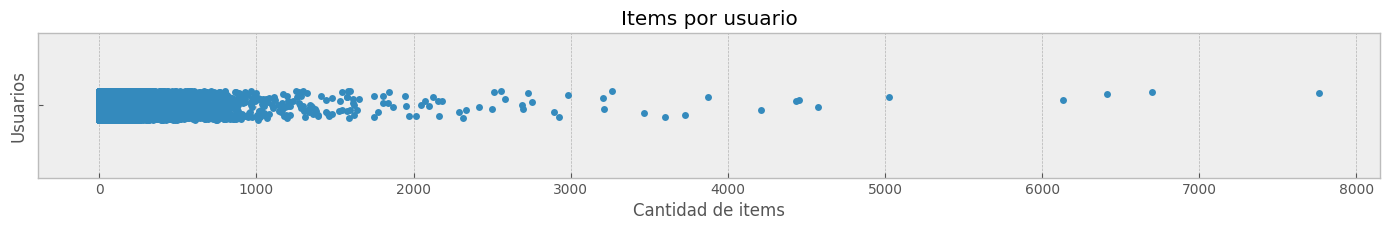

In [85]:
items_por_usuario= df_items.groupby('User_id').count()

fig = plt.figure(figsize=(14, 4))

ax1 = fig.add_subplot(211)
sns.stripplot(data=items_por_usuario, x='Playtime', ax=ax1)
ax1.set_xlabel('Cantidad de items') ; ax1.set_ylabel('Usuarios') ; ax1.set_title('Items por usuario')

# ajustar el espaciado entre subplots
plt.tight_layout()
plt.show()

En la gráfica se observa que la mayoría de los usuarios tienen menos de 1000 items

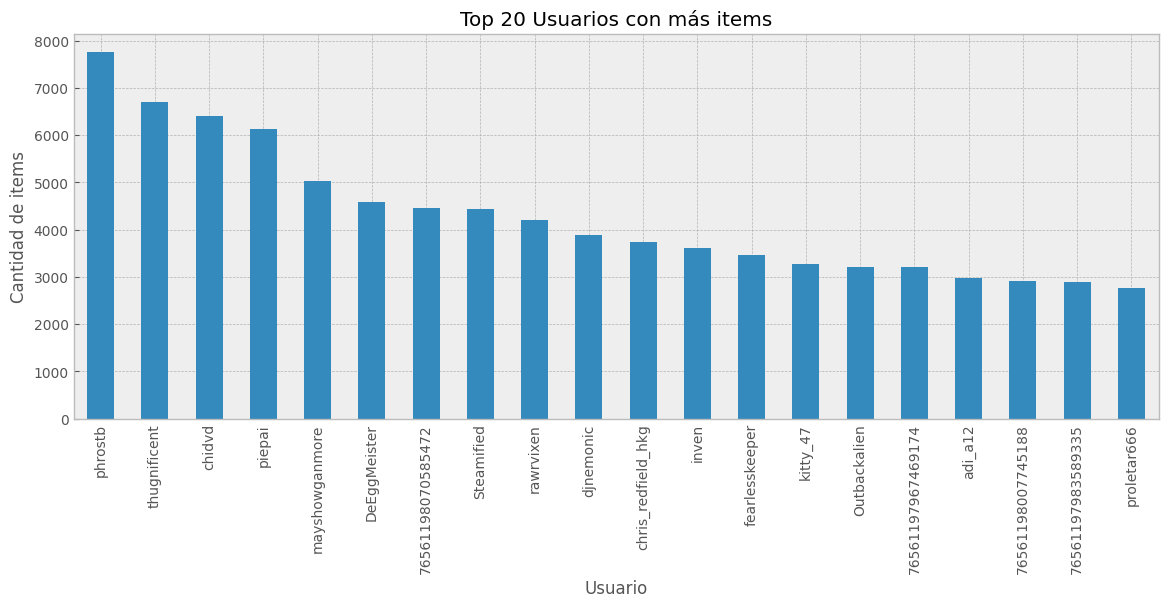

In [111]:
plt.figure(figsize=(14, 5))
df_items.groupby('User_id')['Game_id'].count().sort_values(ascending=False).head(20).plot(kind='bar')
plt.xlabel('Usuario') ; plt.ylabel('Cantidad de items') ; plt.title('Top 20 Usuarios con más items')
plt.show()

## EDA del dataset User Reviews
Este dataset (despiés del ETL) contiene información sobre las reseñas de juegos realizados por los usuarios, si los recomiendan o no y una columna resultado del Sentiment Analysis de los comentarios del archivo original. También incluye el año de posteo de la reseña, id del usuario y el id de cada juego reseñado.

In [112]:
df_reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48949 entries, 0 to 48948
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   User_id             48949 non-null  object 
 1   Game_id             48949 non-null  float64
 2   Recommend           48949 non-null  int64  
 3   Posted_year         48949 non-null  int64  
 4   Sentiment_analysis  48949 non-null  int64  
dtypes: float64(1), int64(3), object(1)
memory usage: 1.9+ MB


In [113]:
# Lo primero que hago es una descripción general con valores estadísiticos
df_reviews.describe(include='all')

,User_id,Game_id,Recommend,Posted_year,Sentiment_analysis
count,48949,48949.000000,48949.000000,48949.000000,48949.000000
unique,23127,NaN,NaN,NaN,NaN
top,itsfilfyd,NaN,NaN,NaN,NaN
freq,10,NaN,NaN,NaN,NaN
mean,NaN,167523.220413,0.894625,2014.018203,1.476557
std,NaN,133042.594981,0.307039,1.580692,0.754388
min,NaN,10.000000,0.000000,1993.000000,0.000000
25%,NaN,8190.000000,1.000000,2014.000000,1.000000
50%,NaN,212070.000000,1.000000,2014.000000,2.000000
75%,NaN,263300.000000,1.000000,2015.000000,2.000000


- Hay un total de 48.949 reseñas, realizadas por 23.127 usuarios diferentes
- El valor promedio de la columna Recommend es de 0.89, es decir que son más las recomendaciones buenas (1) que las malas (0)
- Los años de publicacion se encuentran entre 1993 y 2017
- El promedio de la columna Sentiment Analysis, que tiene 3 posibles valores, -0, 1 y 2- es de 1.476. Haré otros análsis para entender la implicación de este resultado

### Revisión de las columnas Recommend y Sentiment_analysis
Hago un conteo de los valores de las columas Recommend y Sentiment_analysis para contrastar y encontrar relaciones:

In [115]:
df_reviews['Sentiment_analysis'].value_counts()

Sentiment_analysis
2    31150
1     9976
0     7823
Name: count, dtype: int64

In [117]:
df_reviews['Recommend'].value_counts()

Recommend
1    43791
0     5158
Name: count, dtype: int64

- Veo que la cantidad de valores positivos en la columna Sentiment_analysis es consistente con la mayoría de valores positivos en la columna Recommend
- También observo que es menor la cantidad de "No recomendados" (reviews.Recommend=0) que la de comentarios negativos (Sentiment_analysis = 0). Interesante notar que que alguien  pueda tomarse el tiempo de dejar un comentario expresando su inconformidad con un juego,  pero al mismo tiempo ignore la opción de dar NO a recomendar.

Quiero ahora verificar la cantidad de recomendaciones para los distintos sentimientos de las reviews.

In [128]:
# Se agrupa por 'sentiment_analysis' y 'reviews_recommend'
df_agrupado = df_reviews.groupby(['Sentiment_analysis', 'Recommend'])
# Se cuentan la cantidad de reviews en cada grupo
cantidad_grupo = df_agrupado.size()
# Se calcula el porcentaje por cada grupo
porcentaje_grupo = 100 * df_agrupado.size() / len(df_reviews)
# Se crea un datafram con el resumen
sentimiento_recomendacion = pd.DataFrame({
    "Cantidad": cantidad_grupo,
    "Porcentaje": porcentaje_grupo
})
sentimiento_recomendacion

Cantidad  Porcentaje
Sentiment_analysis Recommend                      
0                  0              2216    4.527161
                   1              5607   11.454779
1                  0              1097    2.241108
                   1              8879   18.139288
2                  0              1845    3.769229
                   1             29305   59.868434

Encuentro que:
- Como ya lo vi antes, hay coherencia entre la cantidad de reviews de sentimiento positivo y las recomendaciones positivas, que ademas representan el 59.9% del total de reseñas.
- Hay considerablemente más reviews de sentimiento neutro que corresponden a recomendaciones positivas que a negativas.
- De los comentarios que reflejaron un sentimiento negativo, 11.4% aún recomienda el juego, lo que es algo contradictorio.

Con más tiempo valdría la pena revisar esto a fondo, pues no sé si pudiera llegar a encontrar errores en el proceso de creación de la columna Sentiment_analysis.

### Cantidad de reviews por usuario

In [118]:
recomendaciones_por_usuario = df_reviews.groupby('User_id')['Recommend'].count()
resenias_por_usuario = df_reviews.groupby('User_id')['Sentiment_analysis'].count()

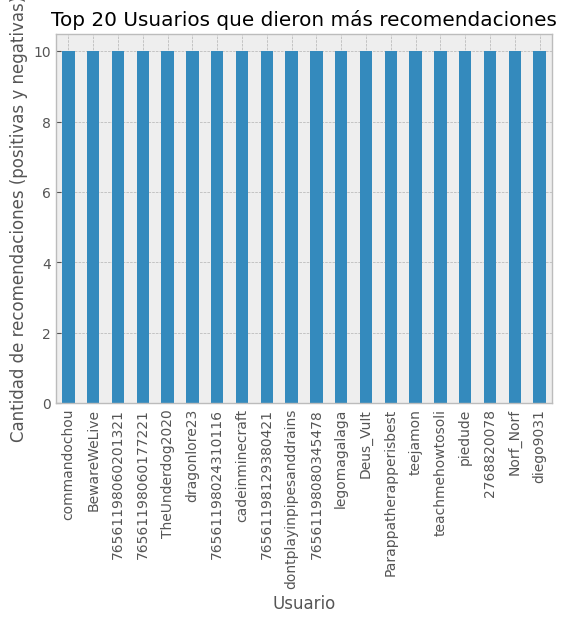

In [130]:
plt.figure()
recomendaciones_por_usuario.sort_values(ascending=False).head(20).plot(kind='bar')
plt.xlabel('Usuario') ; plt.ylabel('Cantidad de recomendaciones (positivas y negativas)') ; plt.title('Top 20 Usuarios que dieron más recomendaciones')
plt.show()

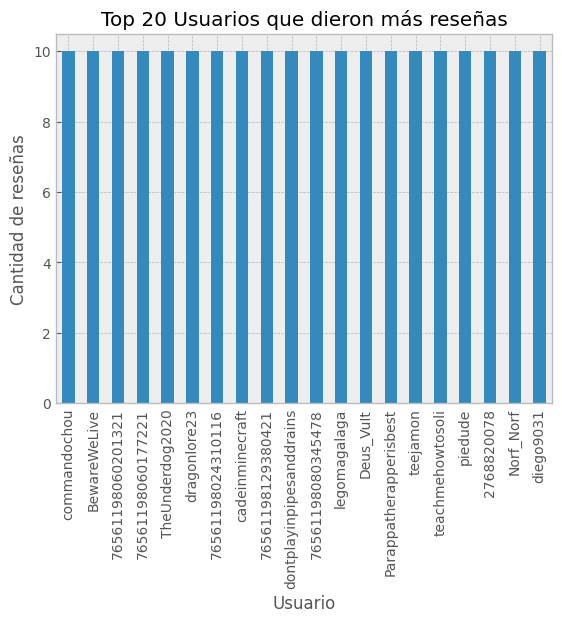

In [127]:
plt.figure()
resenias_por_usuario.sort_values(ascending=False).head(20).plot(kind='bar')
plt.xlabel('Usuario') ; plt.ylabel('Cantidad de reseñas') ; plt.title('Top 20 Usuarios que dieron más reseñas')
plt.show()

### Revisión de las fechas de publicación de los reviews

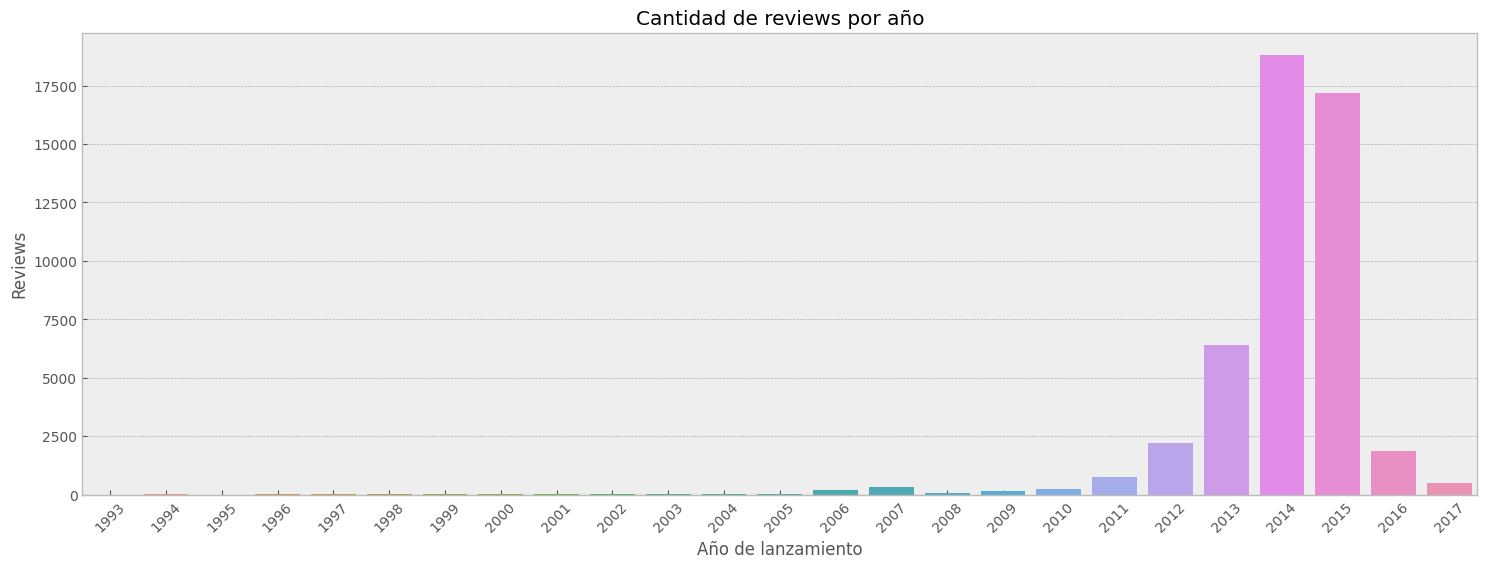

In [144]:
plt.style.use('fast')
plt.figure(figsize=(18,6))
sns.countplot(data = df_reviews, x = "Posted_year")
plt.xticks(rotation=45)
plt.ylabel('Reviews')
plt.xlabel('Año de lanzamiento')
plt.title('Cantidad de reviews por año')
plt.show()